# Medical Cost Personal Insurance Project
### Project Description
Health insurance is a type of insurance that covers medical expenses that arise due to an illness. These expenses could be related to hospitalisation costs, cost of medicines or doctor consultation fees. The main purpose of medical insurance is to receive the best medical care without any strain on your finances. Health insurance plans offer protection against high medical costs. It covers hospitalization expenses, day care procedures, domiciliary expenses, and ambulance charges, besides many others. Based on certain input features such as age , bmi,,no of dependents ,smoker ,region  medical insurance is calculated .
### Columns                                            
* age: age of primary beneficiary
* sex: insurance contractor gender, female, male
* bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9.
* children: Number of children covered by health insurance / Number of dependents
* smoker: Smoking
* region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.
* charges: Individual medical costs billed by health insurance

**Predict :** Can you accurately predict insurance costs?


### Dataset Link-
https://github.com/dsrscientist/dataset4
https://github.com/dsrscientist/dataset4/blob/main/medical_cost_insurance.csv

#### Importing libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
url = 'datasets/medical_cost_insurance.csv'
df = pd.read_csv(url)
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


## Exploratory Data Analysis (EDA)


In [4]:
# checking the dimension of the dataset
df.shape

(1338, 7)

This dataset contains 1338 rows and 7 columns. Out of which 1 is the target variable "charges" and the remaining 6 are independent variables described in the above section _Columns_.

In [5]:
# checking the types of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
# checking the null values
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

* There are three different types of data (int64, float64, and object) present in the dataset. 
* There is no null values.

### Summary statistics of the numerical and non-numerical variables

In [7]:
# Summary statistics of numerical columns
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [8]:
# Look at the non numeric columns
df.describe(exclude=[np.number])

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


From the above description of the numerical columns we can observe the following:

1. The counts of all the columns are the same which confirms there are no missing values in the dataset.
2. The mean value is greater than the median(50%) in `'age'`, `'bmi'`, `'children'` columns which means the data is skewed to right.
3. Apparently there are no outlier values, however we are going to review the `bmi` column in more depth. The maximum value is far away from the Q3 three times the standard deviation.
4. There is not negative/invalid values present.

From the description of the non-numerical columns we can observe the following:

1. Looking at count we can see that there are no null values. There are 1338 values in each column.
2. In column `'sex'` and `'smoker'` there are two unique values, while in `'region'` there are 4 unique values. 
3. The top value for `sex` is male, for `smoker` is no, and for `region` is southeast

In [9]:
# Checking number of unique values in each column
df.nunique().to_frame("No. of unique values")

,No. of unique values
age,47
sex,2
bmi,548
children,6
smoker,2
region,4
charges,1337


These are the unique values present in the dataset. Since the target value is continuous we have to do a regression analysis.

In [12]:
# Separating Numerical and Categorical columns

# Checking for categorical and Numerical columns
categorical_col = []
numerical_col = []

for i in df.dtypes.index:
    if df.dtypes[i] == 'object':
        categorical_col.append(i)
    else:
        numerical_col.append(i)
print(f"Categorical Columns: {categorical_col}")
print(f"Numerical Columns: {numerical_col}")

Categorical Columns: ['sex', 'smoker', 'region']
Numerical Columns: ['age', 'bmi', 'children', 'charges']


## Data Visualization


#### Univariate Analysis

male      676
female    662
Name: sex, dtype: int64

no     1064
yes     274
Name: smoker, dtype: int64

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

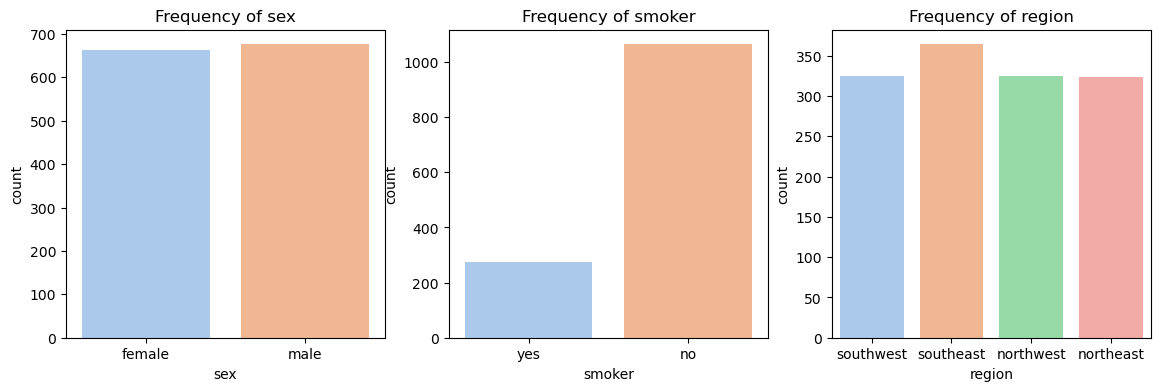

In [54]:
# Checking the value counts of the categorical independent variables)
for col in categorical_col:
    display(df[col].value_counts())

# Visualize the categorical variables
fig, axs = plt.subplots(1, 3, figsize=(14, 4))

for ax, column in zip(axs.flat, categorical_col):
    sns.countplot(data=df, x=column, ax=ax, palette='pastel')
    ax.set_title(f"Frequency of {column}")

plt.subplots_adjust(hspace=0.5)
plt.show()

From the Frequency plot of each column, we can observe the following:
- The total number of males and females are almost the same.
- "Non-Smoker" count is high compared to "Yes Smoker" count by more than double.
- The frequencies of the regions are approximately balanced, only southeast is slightly higher.

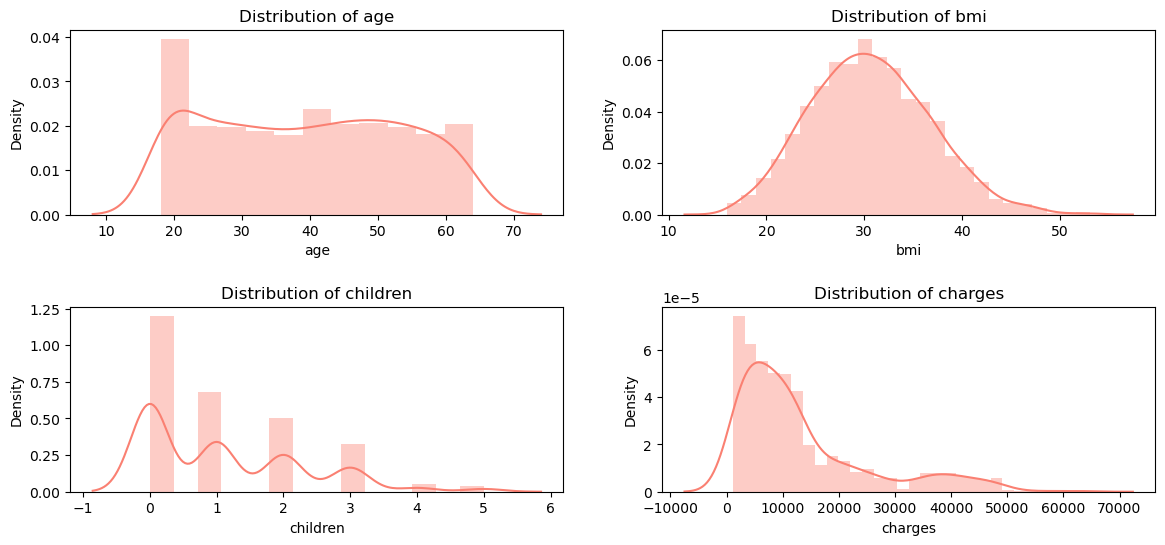

In [51]:
# Visualizing the distribution of the numerical columns 

fig, axs = plt.subplots(2, 2, figsize=(14, 6))
for ax, column in zip(axs.flat, numerical_col):
    sns.distplot( df[column], ax=ax,  color='salmon')
    ax.set_title(f"Distribution of {column}")

plt.subplots_adjust(hspace=0.5)
plt.show()

From the above distribution plots we can notice the following:
- The data almost looks normal in age and bmi although there may be outliers in the bmi column.
- The data in the column Charges (target) is skewed to the right. 
- The data of the column children is discrete, with a majority of 0 children.

In [56]:
# Checking for skewness
df.skew()

age         0.055673
bmi         0.284047
children    0.938380
charges     1.515880
dtype: float64

`Charges` is the target variable, and `children` is a categorical variable, even when its values are numerical, so no need to remove skewness. 

#### Bivariate Analysis


#### Correlation between target variable and independent variables.

In [ ]:
# Checking the correlation between features and the target.
cor = df.corr()
cor